In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Teste colab Windows 05/05/2024

In [2]:
df = pd.read_csv(r'C:\Users\ferna\OneDrive\1. Educacao\B. Cursos e Palestras\Data Science\Antigos\BASES DE DADOS\BD_ML-e-DS-com-Python-de-A-a-Z\credit_data.csv')
# df = pd.read_csv('/content/credit_data.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  1997 non-null   int64  
 1   income    1997 non-null   float64
 2   age       1997 non-null   float64
 3   loan      1997 non-null   float64
 4   default   1997 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 93.6 KB


In [5]:
df

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


Sem padronizar os dados

In [6]:
x = df.iloc[:, 1:4].values
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [7]:
y = df['default'].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)

c:\Users\ferna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


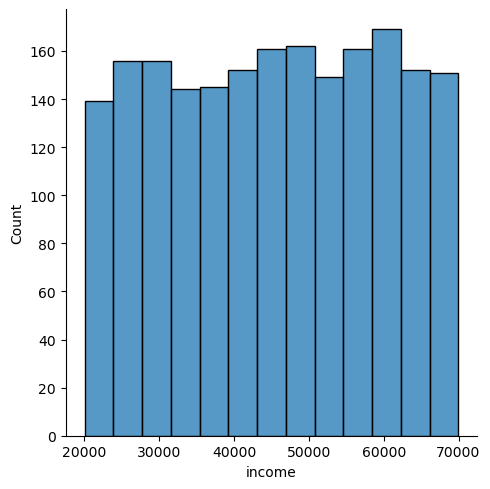

In [10]:
sns.displot(df['income'])

c:\Users\ferna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


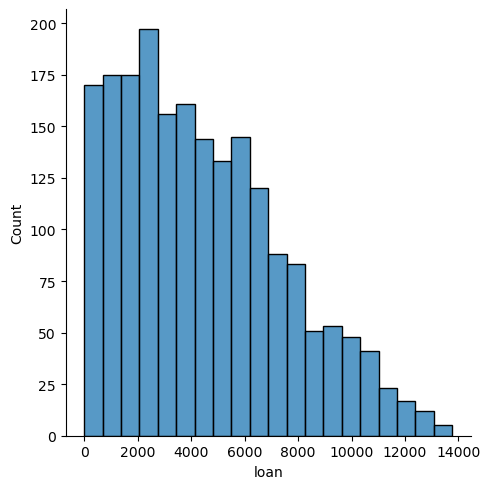

In [11]:
sns.displot(df['loan'])

In [12]:
np.mean(x_treinamento[0]), np.median(x_treinamento[0]), np.std(x_treinamento[0])

(17648.845710949256, 6868.98780501089, 20267.245463490377)

In [13]:
knn = KNeighborsClassifier()

knn.fit(x_treinamento, y_treinamento)

KNeighborsClassifier()

In [14]:
previsoes = knn.predict(x_teste)

In [15]:
accuracy_score(y_teste, previsoes)

0.84

Padronizando os dados

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
z_score_treinamento = StandardScaler()
z_score_teste = StandardScaler()

In [18]:
x_treinamento_p = z_score_treinamento.fit_transform(x_treinamento)
x_teste_p = z_score_teste.fit_transform(x_teste)

In [19]:
x_treinamento_p, x_teste_p

(array([[ 0.06703098, -0.10912129,  0.80653702],
        [ 0.20522574, -0.91268446, -1.43858315],
        [ 0.16580759, -1.00274343,  0.30984014],
        ...,
        [-0.74655252, -0.65047644,  0.52679277],
        [ 1.26538739, -1.11031504, -0.3055711 ],
        [ 1.70458749, -1.48252828,  1.17376849]]),
 array([[ 0.84800337,  0.48778483, -1.2476234 ],
        [-0.55531159, -0.83664805,  0.61873759],
        [-0.43908649, -0.98642763, -1.45813294],
        ...,
        [-1.48875358,  0.79848683, -0.76491618],
        [ 0.88558498, -0.36359561,  1.19670463],
        [ 0.64862908, -1.56619003,  1.00982115]]))

In [20]:
np.mean(x_treinamento_p[0]), np.median(x_treinamento_p[0]), np.std(x_treinamento_p[0])

(0.2548155714452886, 0.06703097932407044, 0.3966987329064017)

In [21]:
knn_p = KNeighborsClassifier()

knn_p.fit(x_treinamento_p, y_treinamento)

KNeighborsClassifier()

In [22]:
previsoes = knn.predict(x_teste_p)

In [23]:
accuracy_score(y_teste, previsoes)

0.8575